# My Implementation of the Perceptron Algorithm

In this blog post, I attempted to implement the perceptron algorithm using numerical programming and demonstrate its use on synthetic data sets.

In class, we learned that there is a we can have a data set described by:


* A matrix $X \in R^{n\times p}$ of predictor variables. There are n observations with p features.
* A vector $y \in \{0,1\}^{n}$ of binary labels.

Given these, we are also assuming that out data are linearly (or almost linearly) seperated. Considering this, there also exists a vector $w \in p$ and a scalar $b$ for every $i$,

$\begin{aligned}
y_i &= \begin{cases} 0 & \langle w, x_i \rangle < b \\
                     1 & \langle w, x_i \rangle \geq b
      \end{cases} \\
    &= \mathbb{1}(\langle w, x_i \rangle \geq b)
\end{aligned}$

Given the the below code from blog post instructions, there will be $p = 2$ features.

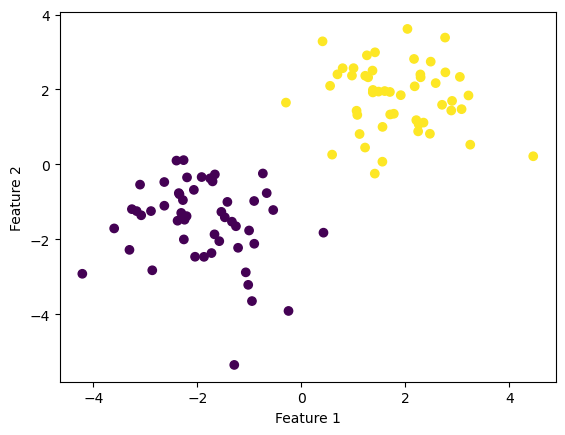

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs

np.random.seed(7654)

n = 100
p_features = 3

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

Between the above two clouds, you can imagine drawing a line which divides both colors perfectly. With a ruler and a pencil this might appear to be easy to do. 
<div class="alert alert-block alert-warning">
<b>Warning:</b> Don't draw on you screen. It might ruin it</div> 

Instead, I have implemented a python algorithm `perceptron.py` to do it for us!

You can find my `perceptron.py` at __[link text](http://url)__

## The Algorithm Will Do Algorithms do

In [75]:
from perceptron import Perceptron


In [76]:
p = Perceptron()
p.fit(X, y, max_steps = 1000)

This p instance of the class `Perceptron` has an instance variable `w` of weights:

In [77]:
p.w

array([1.65498039, 2.17749966, 0.89225686])

As well as an instance variable `history` of scores:

In [78]:
print(p.history[-10:]) #just the last few values

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


And here we can visualize how the *hopefully* got better over each iteration:

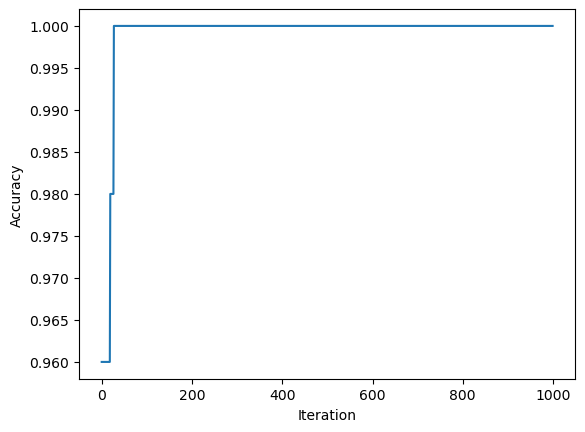

In [79]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

> And below we can see our amazing line which seperates the two blobs perfectly. In this case we acheived *perfect* seperation!

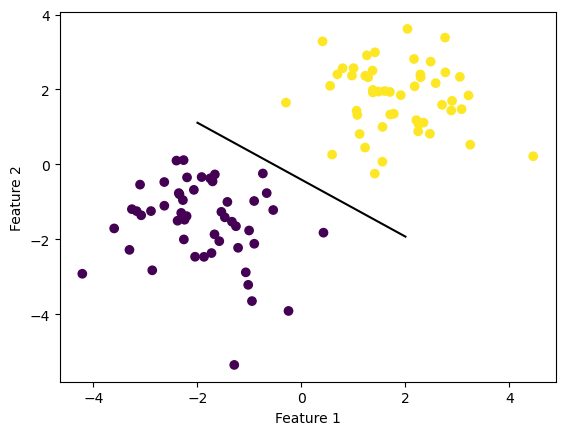

In [80]:
def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

We can prove our perfectness of seperation with the `score` method:

In [81]:
p.score(X, y)

1.0

This score should be the same as the final `history` value.

***

# More experimentation!

Let's create some non-linearly seperable synthetic data sets, just so we can prove my algorithm can frind the next closest line of seperability.

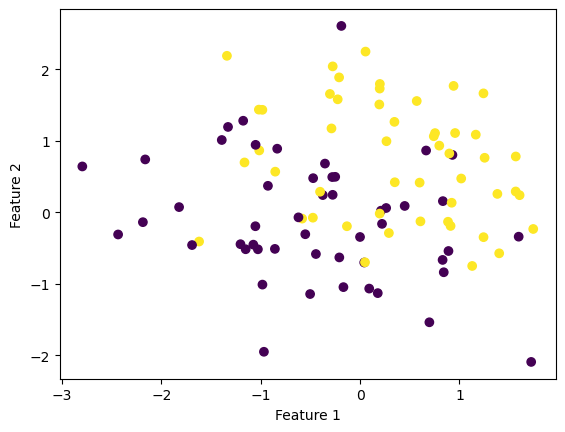

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs

np.random.seed(54321)

n = 100
p_features = 3

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-0.5, -0.5), (0.5, 0.5)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

In the above plot of clouds, the dots very clearly overlap, and finding a line to divide them completely won't be possible. Instead, we can have the algorithm keep trying it's best until the `max_steps` is reached:

In [83]:
p = perceptron.Perceptron()
p.fit(X, y, max_steps = 10000)

I set the `max_steps` here to be a bit higher so the algorithm can have more time to do its best.
Here is the same `p` instance of the class `Perceptron`, with the same instance variable `w` of weights:

In [84]:
p.w

array([ 1.14190182,  1.59493071, -0.73332539])

And putting everything together, we get a line that tries to seperate both dot blobs:

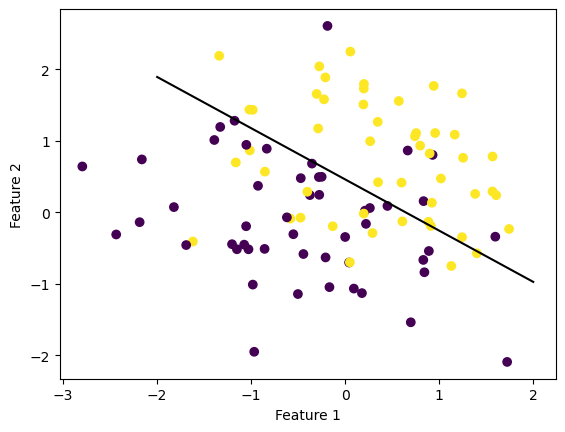

In [85]:
def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

We can do the same chack of the `score`:

In [86]:
p.score(X, y)

0.62

So it looks like the score did not get to $1$, and in the above graph you can see that there are a few yellow dots on the purple side and vice versa. Because of the random nature of how the vector `w` is initialized, some instances of running the algorithm will be better and some not so much.

Again we can also visualize the progress the algorithm made with the `history` graph:

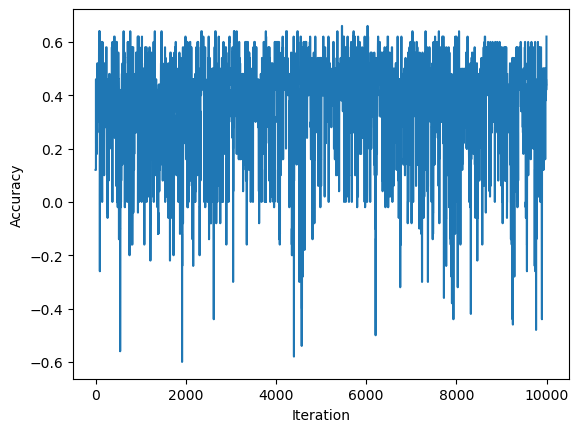

In [87]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

It looks like that having `max_steps` be higher really doesn't help much, so let's see what happens again with the same data with less iterations:

In [88]:
p = perceptron.Perceptron()
p.fit(X, y, max_steps = 1000)

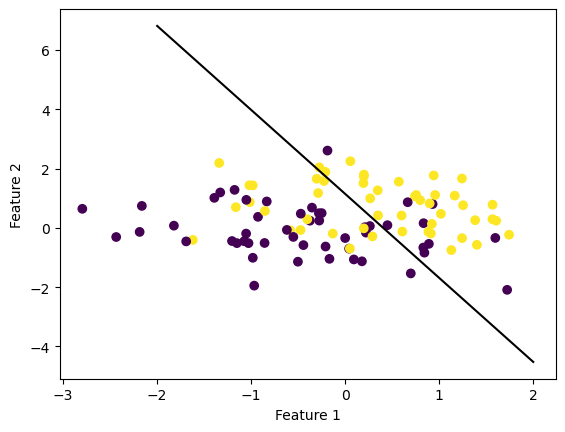

In [89]:
def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

And the `score`:

In [90]:
p.score(X, y)

0.46

And the `history` graph:

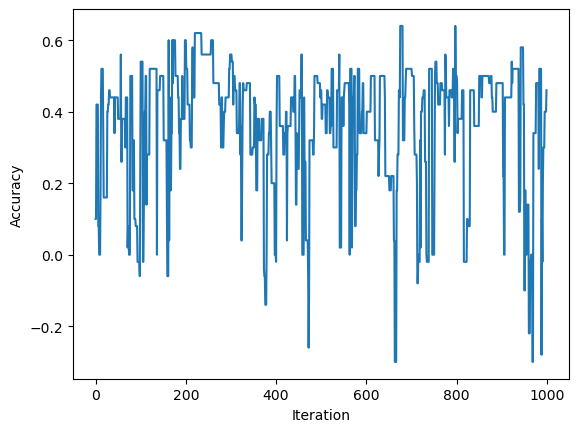

In [91]:
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

So actually, it looks like the accuracy at times reached $0.6$, depending on the final iteration and randomness from the `index i` within the number of observations, we can get a worse score.